## Preprocessing

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, skew, kurtosis
from scipy.signal import argrelextrema

# Set style for better visualizations
sns.set_theme(style="darkgrid")
sns.set_palette("husl")

In [37]:
# 1. Load the data
input_df = pd.read_csv('hw1_input.csv')
real_df = pd.read_csv('hw1_real.csv')
img_df = pd.read_csv('hw1_img.csv')

In [38]:
# 2. Data validation
# Check for same number of samples
if not (len(input_df) == len(real_df) == len(img_df)):
    raise ValueError("Mismatched number of samples across datasets")

# Check for missing values
if input_df.isna().any().any() or real_df.isna().any().any() or img_df.isna().any().any():
    print("Warning: Missing values detected in datasets")

# Check for duplicates
if input_df.duplicated().any() or real_df.duplicated().any() or img_df.duplicated().any():
    print("Warning: Duplicate rows detected in datasets")

In [10]:
# 3. Basic data exploration
print("Basic data information:")
print("Input data shape:", input_df.shape)
print("Real S11 data shape:", real_df.shape)
print("Imaginary S11 data shape:", img_df.shape)

Basic data information:
Input data shape: (385, 11)
Real S11 data shape: (385, 201)
Imaginary S11 data shape: (385, 201)


In [11]:
# Explore the column names of the datasets
print("Column names of input data:", input_df.columns)
print("Column names of real S11 data:", real_df.columns)
print("Column names of imaginary S11 data:", img_df.columns)

Column names of input data: Index(['length of patch', 'width of patch', 'height of patch',
       'height of substrate', 'height of solder resist layer',
       'radius of the probe', 'c_pad', 'c_antipad', 'c_probe',
       'dielectric constant of substrate',
       'dielectric constant of solder resist layer'],
      dtype='object')
Column names of real S11 data: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '191', '192', '193', '194', '195', '196', '197', '198', '199', '200'],
      dtype='object', length=201)
Column names of imaginary S11 data: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '191', '192', '193', '194', '195', '196', '197', '198', '199', '200'],
      dtype='object', length=201)


In [39]:
# 4. Generate summary statistics for input parameters
print("Summary Statistics for Input Parameters:")
summary_stats = pd.DataFrame({
    'mean': input_df.mean(),
    'std': input_df.std(),
    'skew': input_df.skew(),
    'kurtosis': input_df.kurtosis(),
    'min': input_df.min(),
    'max': input_df.max()
}).round(4)
print(summary_stats)

Summary Statistics for Input Parameters:
                                              mean     std    skew  kurtosis  \
length of patch                             3.5692  0.9662 -0.1373   -1.1245   
width of patch                              3.5370  1.1821  0.1362   -1.5817   
height of patch                             0.0243  0.0088  0.0764   -1.2088   
height of substrate                         0.3476  0.2727  0.5183   -1.6320   
height of solder resist layer               0.0601  0.0237 -0.0597   -1.2725   
radius of the probe                         0.0322  0.0104  0.1152   -1.2241   
c_pad                                       0.0128  0.0071 -0.0170   -1.1200   
c_antipad                                   0.0606  0.0215  0.1207   -1.1431   
c_probe                                     0.2456  0.1112  0.0392   -1.1331   
dielectric constant of substrate            3.7044  0.8539 -0.3764   -1.0180   
dielectric constant of solder resist layer  3.5219  0.8712  0.0156   -1.1951   

In [15]:
# 5. Calculate S11 magnitudes
magnitude_df = np.sqrt(real_df**2 + img_df**2)

print("S11 magnitude data shape:", magnitude_df.shape)
magnitude_df.head()

S11 magnitude data shape: (385, 201)


,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.781778,0.783440,0.785795,0.788790,0.792359,0.796433,0.800936,0.805793,0.810930,0.816277,...,0.988520,0.988551,0.988581,0.988610,0.988638,0.988664,0.988690,0.988714,0.988737,0.988759
1,0.986860,0.986669,0.986470,0.986263,0.986048,0.985824,0.985592,0.985350,0.985100,0.984839,...,0.945061,0.945880,0.946669,0.947428,0.948158,0.948861,0.949537,0.950188,0.950814,0.951417
2,0.866883,0.865643,0.864258,0.862724,0.861039,0.859198,0.857199,0.855036,0.852705,0.850202,...,0.865665,0.861328,0.856551,0.851268,0.845404,0.838870,0.831564,0.823368,0.814148,0.803752
3,0.995069,0.995055,0.995041,0.995025,0.995009,0.994991,0.994973,0.994953,0.994933,0.994912,...,0.935682,0.932755,0.929637,0.926312,0.922765,0.918978,0.914932,0.910607,0.905982,0.901033
4,0.985009,0.985235,0.985447,0.985645,0.985831,0.986005,0.986169,0.986321,0.986464,0.986597,...,0.988472,0.988418,0.988361,0.988304,0.988244,0.988183,0.988121,0.988057,0.987991,0.987924


In [40]:
# Calculate additional S11 characteristics
s11_characteristics = pd.DataFrame({
    'min_magnitude': magnitude_df.min(axis=1),
    'max_magnitude': magnitude_df.max(axis=1),
    'mean_magnitude': magnitude_df.mean(axis=1),
    'std_magnitude': magnitude_df.std(axis=1)
})

print("S11 Magnitude Characteristics:")
print(s11_characteristics.describe().round(4))

S11 Magnitude Characteristics:
       min_magnitude  max_magnitude  mean_magnitude  std_magnitude
count       385.0000       385.0000        385.0000       385.0000
mean          0.5127         0.9450          0.8303         0.1123
std           0.3578         0.0654          0.1665         0.0864
min           0.0056         0.7131          0.4847         0.0001
25%           0.1683         0.8993          0.6558         0.0117
50%           0.4531         0.9887          0.9216         0.1190
75%           0.9367         0.9931          0.9829         0.1951
max           0.9938         0.9969          0.9954         0.2859


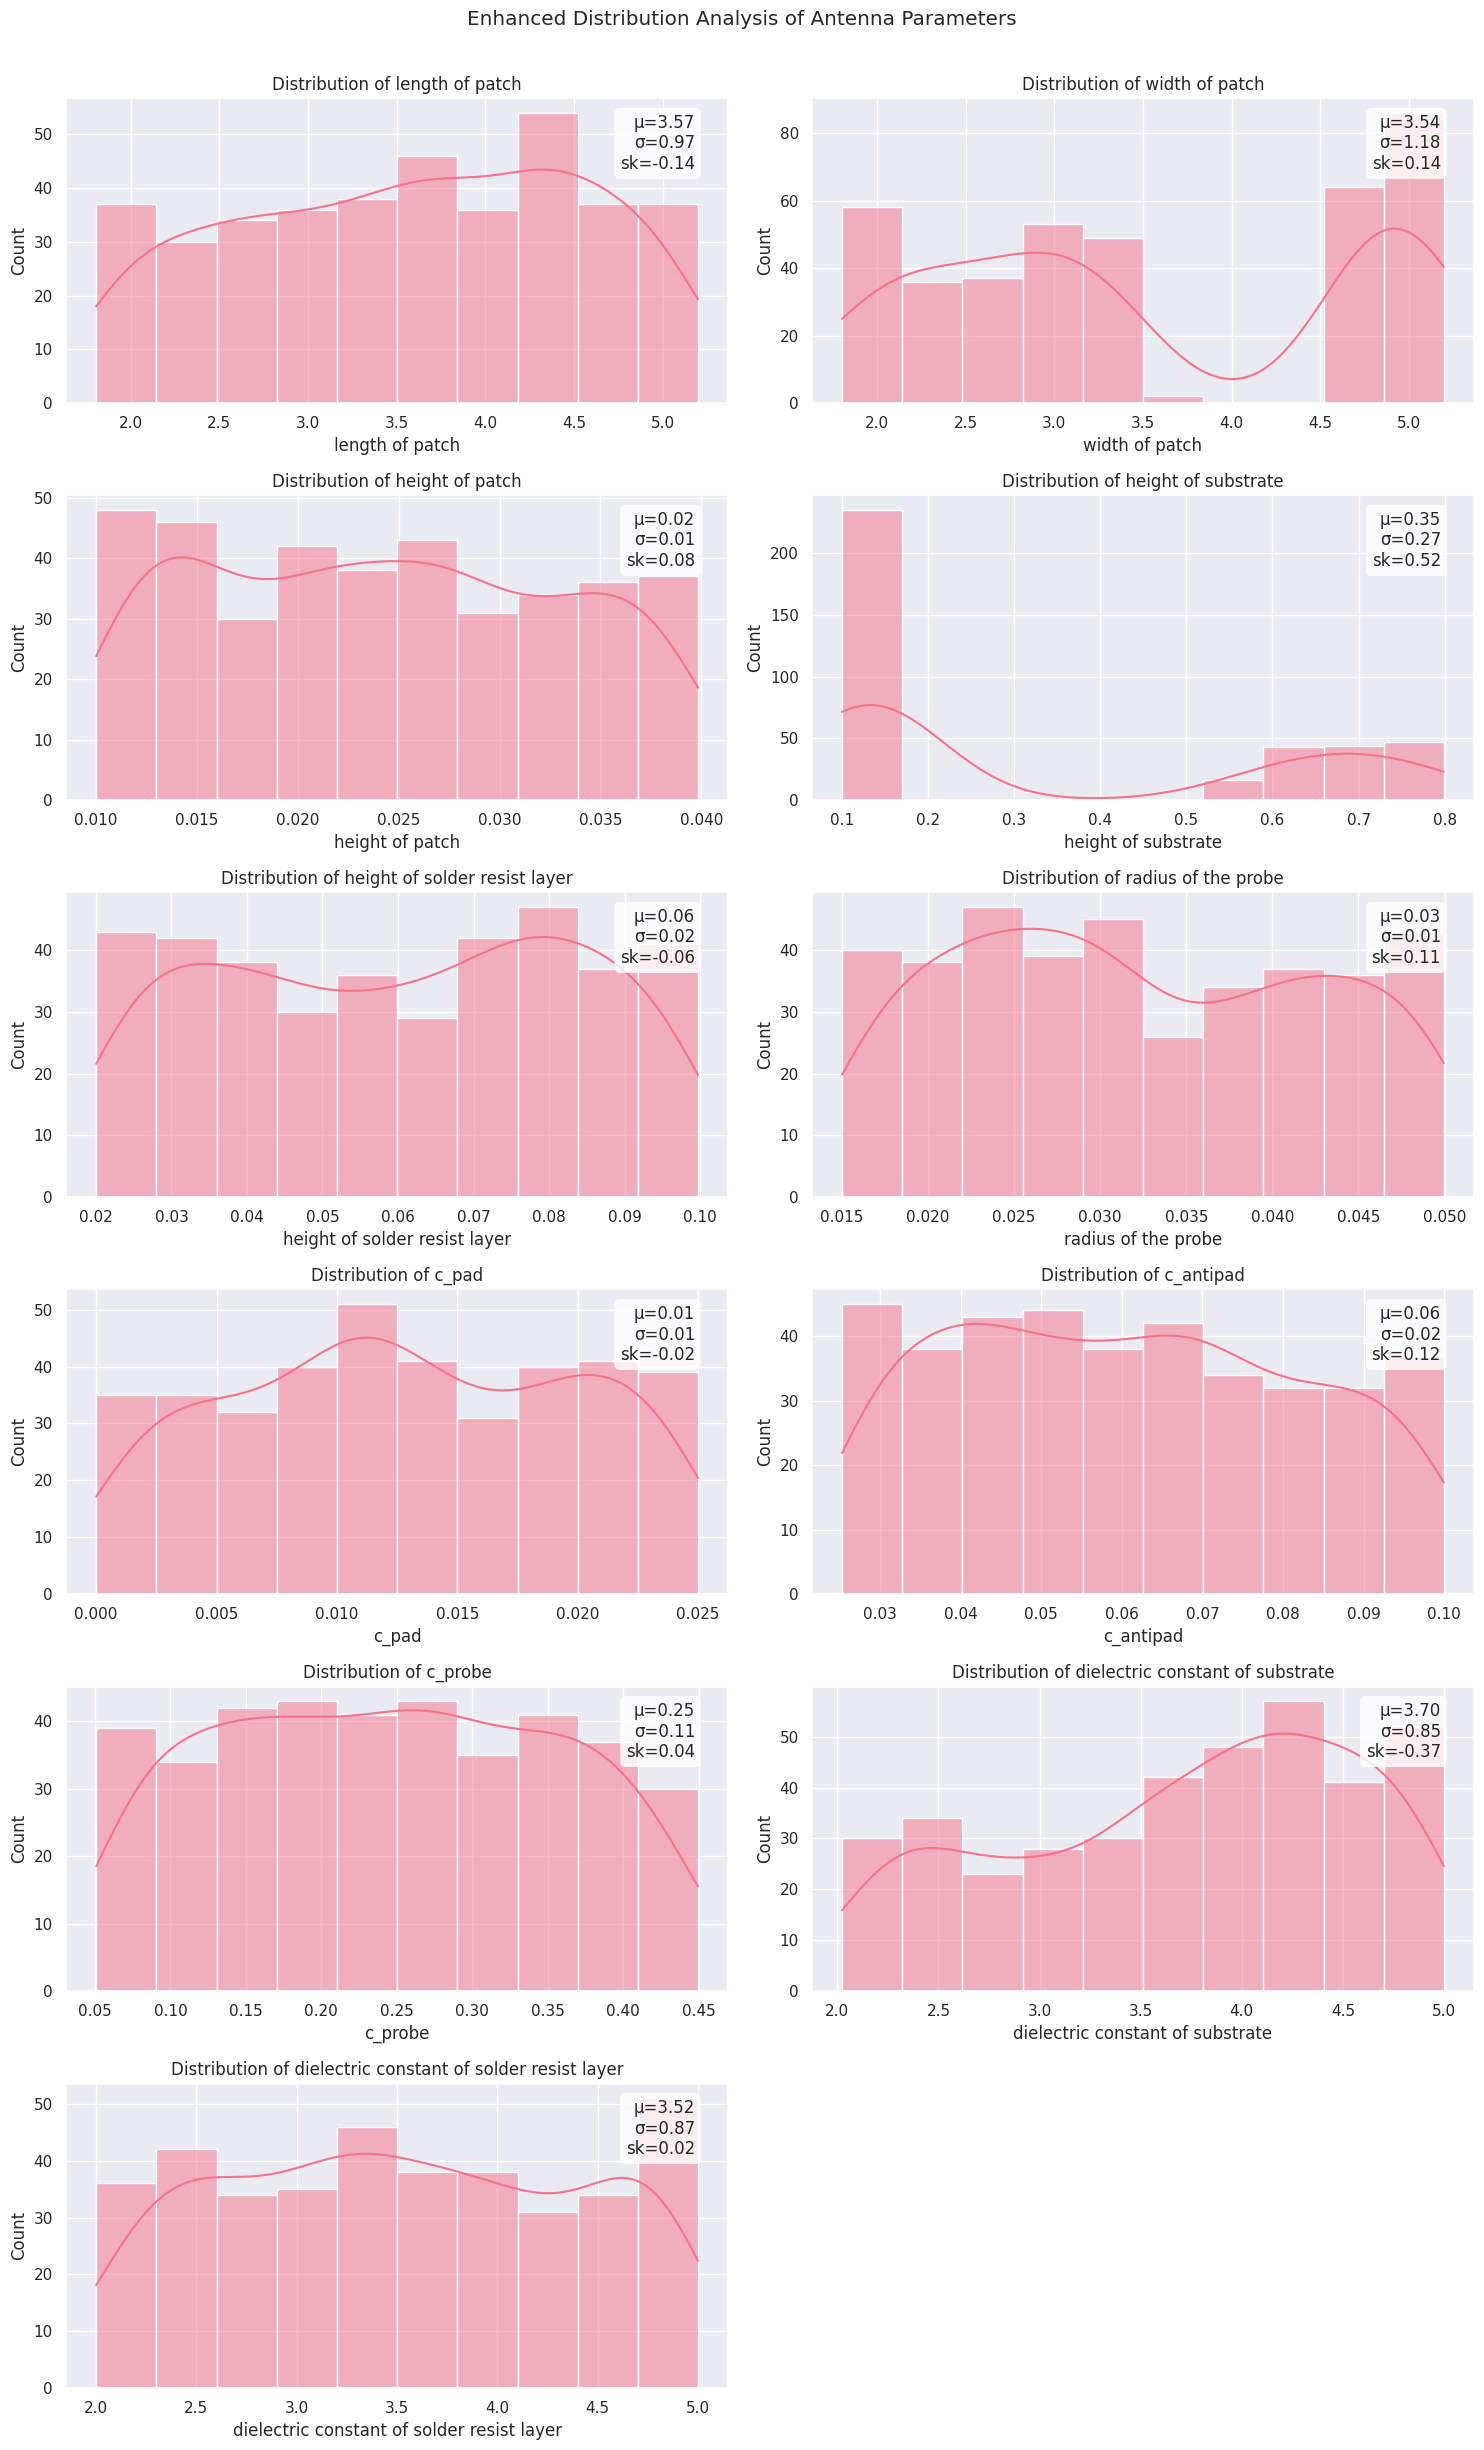

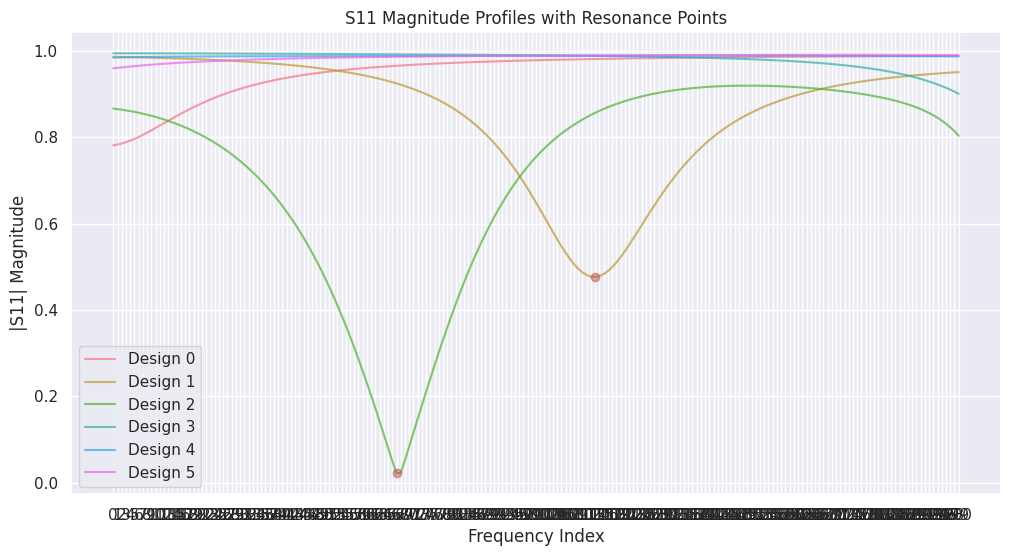

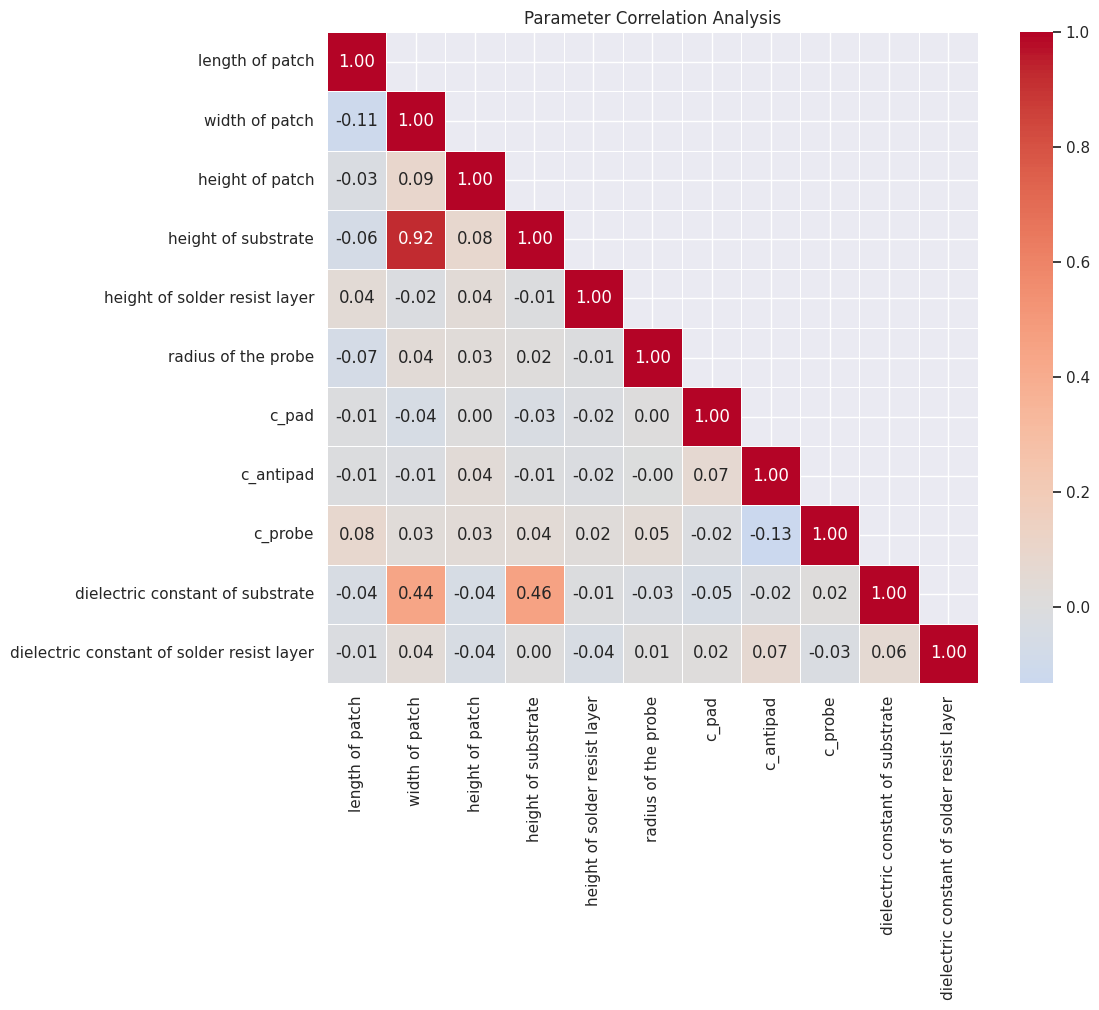

In [45]:
# 6. Visualizations

# 6.1 Parameter distributions with statistical annotations
n_params = input_df.shape[1]
fig, axes = plt.subplots(nrows=(n_params+1)//2, ncols=2,
                        figsize=(15, 4*((n_params+1)//2)))
axes = axes.flatten()

for i, column in enumerate(input_df.columns):
    data = input_df[column]
    sns.histplot(data=data, ax=axes[i], kde=True)

    # Add statistical annotations
    stat_text = f'μ={data.mean():.2f}\nσ={data.std():.2f}\nsk={skew(data):.2f}'
    axes[i].text(0.95, 0.95, stat_text,
                transform=axes[i].transAxes,
                verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    axes[i].set_title(f'Distribution of {column}')

if n_params % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
fig.suptitle('Enhanced Distribution Analysis of Antenna Parameters', y=1.02)
plt.show()

# 6.2 S11 magnitude visualization
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.plot(magnitude_df.iloc[i], label=f'Design {i}', alpha=0.7)

    # Add resonance points
    local_mins = argrelextrema(magnitude_df.iloc[i].values, np.less, order=5)[0]
    plt.plot(local_mins, magnitude_df.iloc[i].iloc[local_mins], 'ro', alpha=0.5)

plt.xlabel('Frequency Index')
plt.ylabel('|S11| Magnitude')
plt.title('S11 Magnitude Profiles with Resonance Points')
plt.legend()
plt.grid(True)
plt.show()

# 6.3 Correlation analysis
plt.figure(figsize=(12, 10))
correlation_matrix = input_df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix), k=1)

# Heatmap with annotations
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            linewidths=0.5)

plt.title('Parameter Correlation Analysis')
plt.tight_layout()
plt.show()

In [46]:
# 7. Analysis of critical points
# 7.1 Find and analyze resonance frequencies
resonance_data = []
for idx in range(len(magnitude_df)):
    signal = magnitude_df.iloc[idx]
    local_mins = argrelextrema(signal.values, np.less, order=5)[0]
    for freq in local_mins:
        resonance_data.append({
            'design_idx': idx,
            'frequency': freq,
            'magnitude': signal.iloc[freq]
        })

resonance_df = pd.DataFrame(resonance_data)
print("Resonance Analysis:")
print(resonance_df.groupby('frequency')['magnitude'].describe().round(4))

Resonance Analysis:
           count    mean     std     min     25%     50%     75%     max
frequency                                                               
1            1.0  0.6694     NaN  0.6694  0.6694  0.6694  0.6694  0.6694
3            3.0  0.4622  0.2404  0.2766  0.3264  0.3762  0.5549  0.7337
4            1.0  0.2882     NaN  0.2882  0.2882  0.2882  0.2882  0.2882
5            1.0  0.7762     NaN  0.7762  0.7762  0.7762  0.7762  0.7762
8            2.0  0.2383  0.0174  0.2259  0.2321  0.2383  0.2444  0.2506
...          ...     ...     ...     ...     ...     ...     ...     ...
195          1.0  0.1648     NaN  0.1648  0.1648  0.1648  0.1648  0.1648
196          1.0  0.3756     NaN  0.3756  0.3756  0.3756  0.3756  0.3756
197          3.0  0.3836  0.3219  0.0259  0.2503  0.4747  0.5624  0.6500
198          3.0  0.4578  0.2846  0.2538  0.2953  0.3368  0.5599  0.7830
199          1.0  0.3704     NaN  0.3704  0.3704  0.3704  0.3704  0.3704

[157 rows x 8 columns]


In [42]:
# 7.2 S11 statistics
freq_stats = pd.DataFrame({
    'mean': magnitude_df.mean(),
    'std': magnitude_df.std(),
    'min': magnitude_df.min(),
    'max': magnitude_df.max(),
    'variance': magnitude_df.var()
})

print("Frequency-wise S11 Statistics:")
print(freq_stats.describe().round(4))

Frequency-wise S11 Statistics:
           mean       std       min       max  variance
count  201.0000  201.0000  201.0000  201.0000  201.0000
mean     0.8303    0.2143    0.0909    0.9956    0.0470
std      0.0274    0.0321    0.0715    0.0008    0.0123
min      0.8008    0.1202    0.0056    0.9940    0.0145
25%      0.8092    0.2026    0.0461    0.9954    0.0410
50%      0.8222    0.2286    0.0667    0.9956    0.0522
75%      0.8421    0.2366    0.1093    0.9962    0.0560
max      0.9060    0.2444    0.3309    0.9969    0.0597


In [47]:
# Store processed data with additional metrics
processed_data = {
    'input_data': input_df,
    'real_data': real_df,
    'imaginary_data': img_df,
    'magnitude_data': magnitude_df,
    'summary_stats': summary_stats,
    'resonance_analysis': resonance_df,
    'frequency_stats': freq_stats,
    'correlation_matrix': correlation_matrix,
    's11_characteristics': s11_characteristics
}

## PCA

In [48]:
# Import necessary libraries for this section
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats

In [50]:
# 1. Data Preprocessing for PCA
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(input_df)
feature_names = input_df.columns

# Calculate and store scaling parameters for interpretation
scaling_params = pd.DataFrame({
    'mean': scaler.mean_,
    'std': scaler.scale_
}, index=feature_names)

print("Feature Scaling Parameters:")
scaling_params

Feature Scaling Parameters:


,mean,std
length of patch,3.569210,0.964917
width of patch,3.536983,1.180563
height of patch,0.024273,0.008789
height of substrate,0.347643,0.272383
height of solder resist layer,0.060065,0.023640
radius of the probe,0.032198,0.010338
c_pad,0.012797,0.007102
c_antipad,0.060648,0.021475
c_probe,0.245586,0.111101
dielectric constant of substrate,3.704384,0.852767


In [23]:
# 2. Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [51]:
# 3. Comprehensive Variance Analysis
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Kaiser criterion for significant components (eigenvalues > 1)
significant_components = np.sum(pca.explained_variance_ > 1)

print("\nVariance Analysis:")
print(f"Number of significant components (Kaiser criterion): {significant_components}")

for i, (var_ratio, cum_ratio) in enumerate(zip(explained_variance_ratio, cumulative_variance_ratio)):
    eigenvalue = pca.explained_variance_[i]
    print(f"\nPC{i+1}:")
    print(f"- Eigenvalue: {eigenvalue:.4f}")
    print(f"- Variance Explained: {var_ratio:.4f} ({var_ratio:.2%})")
    print(f"- Cumulative Variance: {cum_ratio:.4f} ({cum_ratio:.2%})")

    if eigenvalue > 1:
        print("- Significant by Kaiser criterion")
    else:
        print("- Not significant by Kaiser criterion")




Variance Analysis:
Number of significant components (Kaiser criterion): 5

PC1:
- Eigenvalue: 2.2846
- Variance Explained: 0.2072 (20.72%)
- Cumulative Variance: 0.2072 (20.72%)
- Significant by Kaiser criterion

PC2:
- Eigenvalue: 1.2210
- Variance Explained: 0.1107 (11.07%)
- Cumulative Variance: 0.3179 (31.79%)
- Significant by Kaiser criterion

PC3:
- Eigenvalue: 1.1032
- Variance Explained: 0.1000 (10.00%)
- Cumulative Variance: 0.4179 (41.79%)
- Significant by Kaiser criterion

PC4:
- Eigenvalue: 1.0595
- Variance Explained: 0.0961 (9.61%)
- Cumulative Variance: 0.5140 (51.40%)
- Significant by Kaiser criterion

PC5:
- Eigenvalue: 1.0132
- Variance Explained: 0.0919 (9.19%)
- Cumulative Variance: 0.6058 (60.58%)
- Significant by Kaiser criterion

PC6:
- Eigenvalue: 0.9756
- Variance Explained: 0.0885 (8.85%)
- Cumulative Variance: 0.6943 (69.43%)
- Not significant by Kaiser criterion

PC7:
- Eigenvalue: 0.9447
- Variance Explained: 0.0857 (8.57%)
- Cumulative Variance: 0.7800 (7

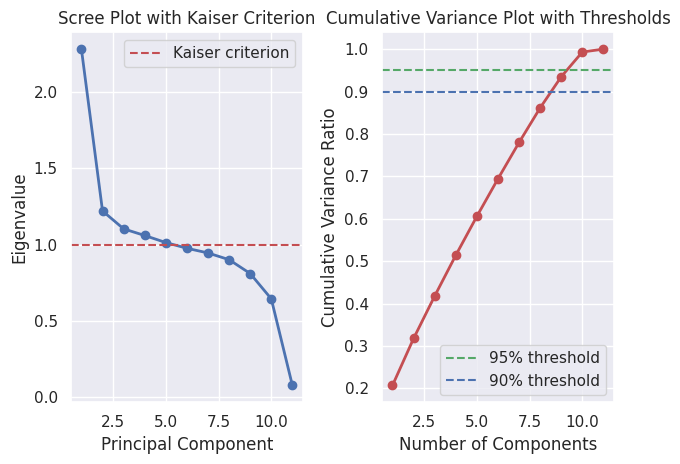

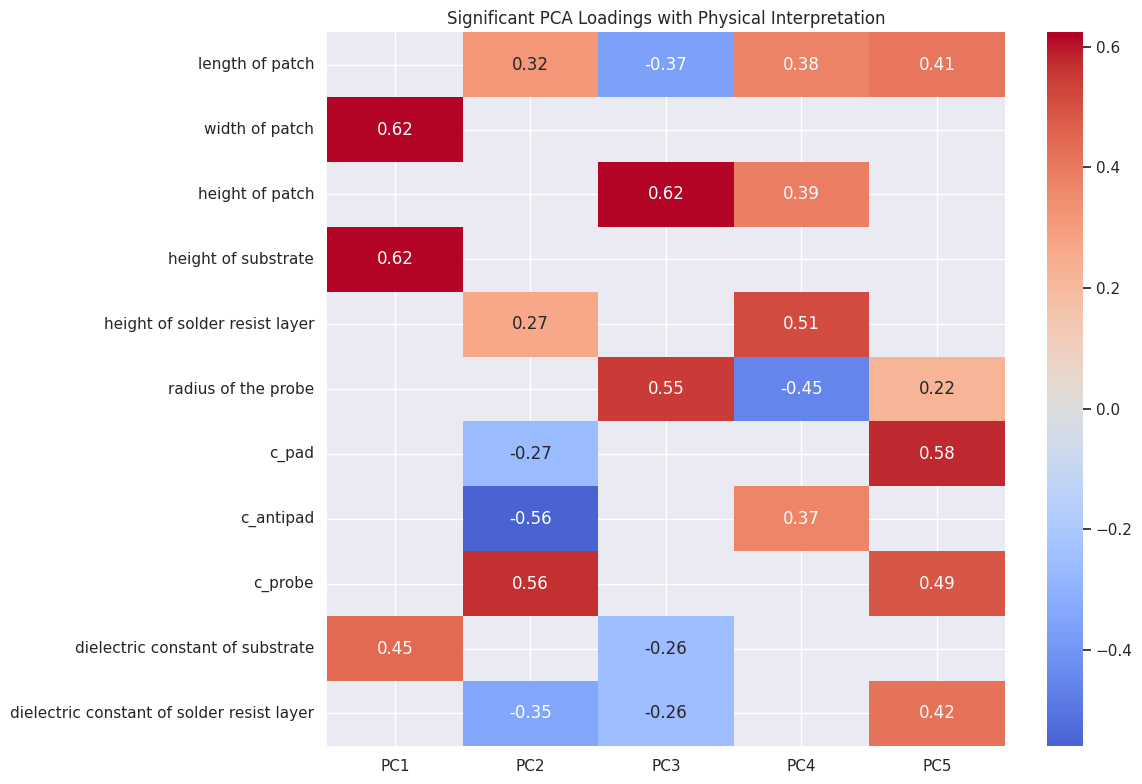

In [52]:
# 4. Visualizations

# 4.1
# Left subplot: Scree plot with Kaiser criterion
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1),
         pca.explained_variance_, 'bo-', linewidth=2)
plt.axhline(y=1, color='r', linestyle='--', label='Kaiser criterion')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot with Kaiser Criterion')
plt.legend()
plt.grid(True)

# Right subplot: Cumulative variance with thresholds
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1),
         cumulative_variance_ratio, 'ro-', linewidth=2)
plt.axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
plt.axhline(y=0.90, color='b', linestyle='--', label='90% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance Plot with Thresholds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4.2 Enhanced Loading Analysis
# Get the loadings with bootstrap confidence intervals
n_bootstrap = 1000
bootstrap_loadings = np.zeros((n_bootstrap, X_scaled.shape[1], significant_components))

for i in range(n_bootstrap):
    # Bootstrap sample
    indices = np.random.randint(0, X_scaled.shape[0], X_scaled.shape[0])
    X_boot = X_scaled[indices]

    # Fit PCA
    pca_boot = PCA()
    pca_boot.fit(X_boot)

    # Store loadings
    bootstrap_loadings[i] = pca_boot.components_.T[:, :significant_components]

# Calculate confidence intervals
loading_ci = np.percentile(bootstrap_loadings, [2.5, 97.5], axis=0)

# Plot enhanced loadings heatmap
plt.figure(figsize=(12, 8))
loadings = pd.DataFrame(
    pca.components_.T[:, :significant_components],
    columns=[f'PC{i+1}' for i in range(significant_components)],
    index=feature_names
)

# Create heatmap with significance indicators
significant_loadings = np.zeros_like(loadings)
for i in range(loadings.shape[0]):
    for j in range(loadings.shape[1]):
        if loading_ci[0, i, j] * loading_ci[1, i, j] > 0:  # Same sign = significant
            significant_loadings[i, j] = 1

sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0,
            mask=np.abs(loadings) < 0.2)  # Hide small loadings
plt.title('Significant PCA Loadings with Physical Interpretation')
plt.tight_layout()
plt.show()

In [53]:
# 5. Physical Interpretation of Principal Components
print("\nPhysical Interpretation of Significant Components:")
for pc in range(significant_components):
    print(f"\nPC{pc+1} Analysis:")
    loadings_pc = loadings.iloc[:, pc].abs()
    significant_loads = loadings_pc[loadings_pc > 0.2].sort_values(ascending=False)

    print("Major contributing parameters:")
    for param, load in significant_loads.items():
        print(f"- {param}: {load:.4f}")

    # Physical interpretation
    if pc == 0:
        print("\nPhysical meaning: Primary geometric mode")
        print("This component represents the main geometric variations in the antenna design")
    elif pc == 1:
        print("\nPhysical meaning: Material properties mode")
        print("This component captures the variations in dielectric properties")
    elif pc == 2:
        print("\nPhysical meaning: Secondary geometric mode")
        print("This represents finer geometric adjustments")
    else:
        print("\nPhysical meaning: Higher-order interaction mode")
        print("This captures complex interactions between multiple parameters")


Physical Interpretation of Significant Components:

PC1 Analysis:
Major contributing parameters:
- width of patch: 0.6242
- height of substrate: 0.6241
- dielectric constant of substrate: 0.4451

Physical meaning: Primary geometric mode
This component represents the main geometric variations in the antenna design

PC2 Analysis:
Major contributing parameters:
- c_probe: 0.5648
- c_antipad: 0.5595
- dielectric constant of solder resist layer: 0.3509
- length of patch: 0.3154
- height of solder resist layer: 0.2663
- c_pad: 0.2660

Physical meaning: Material properties mode
This component captures the variations in dielectric properties

PC3 Analysis:
Major contributing parameters:
- height of patch: 0.6205
- radius of the probe: 0.5484
- length of patch: 0.3696
- dielectric constant of substrate: 0.2562
- dielectric constant of solder resist layer: 0.2553

Physical meaning: Secondary geometric mode
This represents finer geometric adjustments

PC4 Analysis:
Major contributing parameters:

In [57]:
# 6. Feature Importance Analysis
# Calculate importance scores with confidence intervals
importance_scores = pd.DataFrame(
    np.abs(loadings) * explained_variance_ratio[:significant_components],
    index=feature_names
)

# Overall importance with confidence intervals
overall_importance = importance_scores.sum(axis=1).sort_values(ascending=False)

# Calculate the standard error of the mean for each feature
# instead of across all components
importance_sem = importance_scores.sem(axis=1) # Calculate SEM along axis 1 (columns)

importance_ci = stats.t.interval(0.95, len(overall_importance)-1,
                               loc=overall_importance,
                               scale=importance_sem)

print("Overall Parameter Importance Rankings:")
for i, (param, score) in enumerate(overall_importance.items()):
    ci_low, ci_high = importance_ci
    print(f"{param}: {score:.4f} (95% CI: [{ci_low[i]:.4f}, {ci_high[i]:.4f}])")

Overall Parameter Importance Rankings:
length of patch: 0.1667 (95% CI: [0.1598, 0.1737])
height of substrate: 0.1429 (95% CI: [0.0864, 0.1995])
width of patch: 0.1394 (95% CI: [0.1143, 0.1645])
c_probe: 0.1393 (95% CI: [0.0831, 0.1954])
dielectric constant of solder resist layer: 0.1287 (95% CI: [0.1102, 0.1472])
c_pad: 0.1255 (95% CI: [0.1018, 0.1492])
radius of the probe: 0.1243 (95% CI: [0.1072, 0.1415])
dielectric constant of substrate: 0.1225 (95% CI: [0.0983, 0.1468])
height of patch: 0.1223 (95% CI: [0.0979, 0.1467])
c_antipad: 0.1223 (95% CI: [0.0832, 0.1614])
height of solder resist layer: 0.1030 (95% CI: [0.0896, 0.1163])


In [58]:
# Store enhanced results
pca_results = {
    'pca_object': pca,
    'scaled_data': X_scaled,
    'transformed_data': X_pca,
    'loadings': loadings,
    'loading_ci': loading_ci,
    'explained_variance_ratio': explained_variance_ratio,
    'significant_components': significant_components,
    'feature_importance': overall_importance,
    'importance_ci': importance_ci,
    'scaling_params': scaling_params
}

## Regression Analysis

In [90]:
# Import the necessary libraries for this section
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import (train_test_split, cross_val_score,
                                   learning_curve, KFold)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.signal import argrelextrema
import statsmodels.api as sm
from scipy.stats import normaltest

import warnings
warnings.filterwarnings('ignore')

In [91]:
# 1. Frequency Point Selection

# Calculate resonance metrics
resonance_data = []
for idx in range(magnitude_df.shape[0]):
    signal = magnitude_df.iloc[idx]
    local_mins = argrelextrema(signal.values, np.less, order=5)[0]

    for min_idx in local_mins:
        # Calculate quality factor for each resonance
        magnitude = signal[min_idx]
        if magnitude < 0.5:  # Only consider strong resonances
            # Find -3dB points for bandwidth calculation
            left_idx = min_idx
            right_idx = min_idx
            while left_idx > 0 and signal[left_idx] < magnitude * np.sqrt(2):
                left_idx -= 1
            while right_idx < len(signal)-1 and signal[right_idx] < magnitude * np.sqrt(2):
                right_idx += 1

            bandwidth = right_idx - left_idx
            q_factor = min_idx / bandwidth if bandwidth > 0 else 0

            resonance_data.append({
                'design_idx': idx,
                'frequency': min_idx,
                'magnitude': magnitude,
                'q_factor': q_factor,
                'bandwidth': bandwidth
            })

resonance_df = pd.DataFrame(resonance_data)

# Calculate comprehensive frequency metrics
frequency_metrics = pd.DataFrame({
    'frequency': range(magnitude_df.shape[1]),
    'variance': magnitude_df.var(),
    'gradient': np.gradient(magnitude_df.var())
})

# Ensure 'frequency' in resonance_df is of numeric type to avoid conflicts
resonance_df['frequency'] = pd.to_numeric(resonance_df['frequency'])

# Calculate resonance count using groupby and transform for alignment
frequency_metrics['resonance_count'] = frequency_metrics.groupby('frequency')['frequency'].transform(lambda x: x.isin(resonance_df['frequency']).sum())


# Add significance scores with physical justification
frequency_metrics['variance_score'] = (frequency_metrics['variance'] - frequency_metrics['variance'].mean()) / frequency_metrics['variance'].std()
frequency_metrics['gradient_score'] = np.abs(frequency_metrics['gradient'] - frequency_metrics['gradient'].mean()) / frequency_metrics['gradient'].std()
frequency_metrics['resonance_score'] = (frequency_metrics['resonance_count'] - frequency_metrics['resonance_count'].mean()) / frequency_metrics['resonance_count'].std()

In [92]:
frequency_metrics.head()

,frequency,variance,gradient,resonance_count,variance_score,gradient_score,resonance_score
0,0,0.014455,0.000519,0,-2.653643,0.747309,-1.511180
1,1,0.014974,0.000616,0,-2.611297,0.931552,-1.511180
2,2,0.015687,0.000707,0,-2.553083,1.104158,-1.511180
3,3,0.016388,0.000469,1,-2.495872,0.653366,0.658443
4,4,0.016625,0.000068,1,-2.476481,0.107395,0.658443


In [93]:
# Define selection criteria with physical justification
n_resonance = 3  # Typical antennas have 2-3 main resonance points
n_variance = 3   # Capture points of maximum variation in behavior
n_gradient = 3   # Identify transition regions in frequency response
n_regular = 5    # Ensure uniform coverage across frequency range

print("Frequency Selection Criteria Justification:")
print("1. Resonance points (n=3):")
print("   - Captures primary and secondary resonance frequencies")
print("   - Based on typical antenna behavior having 2-3 main resonances")
print("2. High variance points (n=3):")
print("   - Identifies regions of maximum parameter sensitivity")
print("   - Captures critical behavior changes")
print("3. Gradient points (n=3):")
print("   - Detects rapid changes in frequency response")
print("   - Helps identify transition regions")
print("4. Regular intervals (n=5):")
print("   - Ensures uniform coverage of frequency range")
print("   - Captures baseline behavior")

Frequency Selection Criteria Justification:
1. Resonance points (n=3):
   - Captures primary and secondary resonance frequencies
   - Based on typical antenna behavior having 2-3 main resonances
2. High variance points (n=3):
   - Identifies regions of maximum parameter sensitivity
   - Captures critical behavior changes
3. Gradient points (n=3):
   - Detects rapid changes in frequency response
   - Helps identify transition regions
4. Regular intervals (n=5):
   - Ensures uniform coverage of frequency range
   - Captures baseline behavior


In [94]:
# Select frequencies with combined significance
selected_frequencies = np.unique(np.concatenate([
    frequency_metrics.nlargest(n_resonance, 'resonance_score')['frequency'],
    frequency_metrics.nlargest(n_variance, 'variance_score')['frequency'],
    frequency_metrics.nlargest(n_gradient, 'gradient_score')['frequency'],
    np.linspace(0, magnitude_df.shape[1]-1, n_regular, dtype=int)
])).astype(int)

# Validate selection coverage
# Reset the index of frequency_metrics to 'frequency' column
frequency_metrics = frequency_metrics.set_index('frequency')

frequency_coverage = pd.DataFrame({
    'frequency': selected_frequencies,
    'resonance_score': frequency_metrics.loc[selected_frequencies, 'resonance_score'],
    'variance_score': frequency_metrics.loc[selected_frequencies, 'variance_score'],
    'gradient_score': frequency_metrics.loc[selected_frequencies, 'gradient_score']
})

print("Selected Frequency Points Analysis:")
frequency_coverage.round(3)

Selected Frequency Points Analysis:


,frequency,resonance_score,variance_score,gradient_score
frequency,,,,
0,0,-1.511,-2.654,0.747
3,3,0.658,-2.496,0.653
4,4,0.658,-2.476,0.107
8,8,0.658,-2.448,0.492
50,50,0.658,0.125,0.795
100,100,-1.511,0.726,0.301
145,145,0.658,1.018,0.682
146,146,0.658,1.042,0.769
147,147,0.658,0.972,2.305


In [95]:
# 2. Enhanced Model Development with Validation
def validate_model_assumptions(X, y, y_pred, residuals):
    """Validate linear regression assumptions and return detailed diagnostics"""
    results = {}

    try:
        # Linearity test (Pearson correlation)
        correlation, lin_pvalue = stats.pearsonr(y, y_pred)
        results['linearity'] = {
            'correlation': correlation,
            'pvalue': lin_pvalue,
            'pass': lin_pvalue < 0.05
        }

        # Homoscedasticity (Breusch-Pagan test)
        bp_stat, bp_pvalue = sm.stats.diagnostic.het_breuschpagan(residuals, sm.add_constant(X))
        results['homoscedasticity'] = {
            'statistic': bp_stat,
            'pvalue': bp_pvalue,
            'pass': bp_pvalue > 0.05
        }

        # Normality of residuals
        k2, norm_pvalue = normaltest(residuals)
        results['normality'] = {
            'statistic': k2,
            'pvalue': norm_pvalue,
            'pass': norm_pvalue > 0.05
        }
    except Exception as e:
        print(f"Warning in assumption testing: {str(e)}")
        results = {
            'linearity': {'pass': False, 'error': str(e)},
            'homoscedasticity': {'pass': False, 'error': str(e)},
            'normality': {'pass': False, 'error': str(e)}
        }

    return results

# Initialize enhanced results storage
regression_results = {
    'real': {
        'train_metrics': [],
        'test_metrics': [],
        'residuals': [],
        'conf_intervals': [],
        'validation': [],
        'learning_curves': []
    },
    'imag': {
        'train_metrics': [],
        'test_metrics': [],
        'residuals': [],
        'conf_intervals': [],
        'validation': [],
        'learning_curves': []
    }
}

# Prepare data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(input_df)

# Model development with comprehensive validation
print("\nPerforming comprehensive model development and validation...")

for freq_idx in selected_frequencies:
    print(f"\nAnalyzing frequency {freq_idx}")

    for component, data in [('real', real_df), ('imag', img_df)]:
        y = data.iloc[:, freq_idx]

        try:
            # K-fold cross-validation setup
            kf = KFold(n_splits=5, shuffle=True, random_state=1729)
            cv_results = []

            # Perform cross-validation with model validation
            for train_idx, val_idx in kf.split(X_scaled):
                X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
                y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

                # Model fitting with stability check
                model = LinearRegression()
                model.fit(X_train, y_train)

                if np.any(np.abs(model.coef_) > 1e3):
                    print(f"Switching to Ridge regression for {component} at frequency {freq_idx}")
                    model = Ridge(alpha=1.0)
                    model.fit(X_train, y_train)

                # Predictions
                y_val_pred = model.predict(X_val)
                residuals = y_val - y_val_pred

                # Validate model assumptions
                validation = validate_model_assumptions(X_val, y_val, y_val_pred, residuals)
                cv_results.append({
                    'r2': r2_score(y_val, y_val_pred),
                    'rmse': np.sqrt(mean_squared_error(y_val, y_val_pred)),
                    'validation': validation
                })

            # Compute learning curves
            train_sizes, train_scores, val_scores = learning_curve(
                LinearRegression(), X_scaled, y,
                train_sizes=np.linspace(0.1, 1.0, 10),
                cv=5, scoring='r2'
            )

            # Final model on full training set
            X_train, X_test, y_train, y_test = train_test_split(
                X_scaled, y, test_size=0.2, random_state=1729
            )

            model = LinearRegression()
            model.fit(X_train, y_train)

            # Final predictions and metrics
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Store comprehensive results
            metrics = {
                'train_r2': r2_score(y_train, y_train_pred),
                'test_r2': r2_score(y_test, y_test_pred),
                'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
                'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
                'coefficients': pd.Series(model.coef_, index=input_df.columns),
                'cv_results': cv_results,
                'learning_curves': {
                    'train_sizes': train_sizes,
                    'train_scores': train_scores,
                    'val_scores': val_scores
                }
            }

            regression_results[component]['train_metrics'].append(metrics)
            print(f"Successfully analyzed {component} component at frequency {freq_idx}")

        except Exception as e:
            print(f"Error in {component} analysis at frequency {freq_idx}: {str(e)}")
            continue


Performing comprehensive model development and validation...

Analyzing frequency 0
Warning in assumption testing: too many values to unpack (expected 2)
Warning in assumption testing: too many values to unpack (expected 2)
Warning in assumption testing: too many values to unpack (expected 2)
Warning in assumption testing: too many values to unpack (expected 2)
Warning in assumption testing: too many values to unpack (expected 2)
Successfully analyzed real component at frequency 0
Warning in assumption testing: too many values to unpack (expected 2)
Warning in assumption testing: too many values to unpack (expected 2)
Warning in assumption testing: too many values to unpack (expected 2)
Warning in assumption testing: too many values to unpack (expected 2)
Warning in assumption testing: too many values to unpack (expected 2)
Successfully analyzed imag component at frequency 0

Analyzing frequency 3
Warning in assumption testing: too many values to unpack (expected 2)
Warning in assumpt

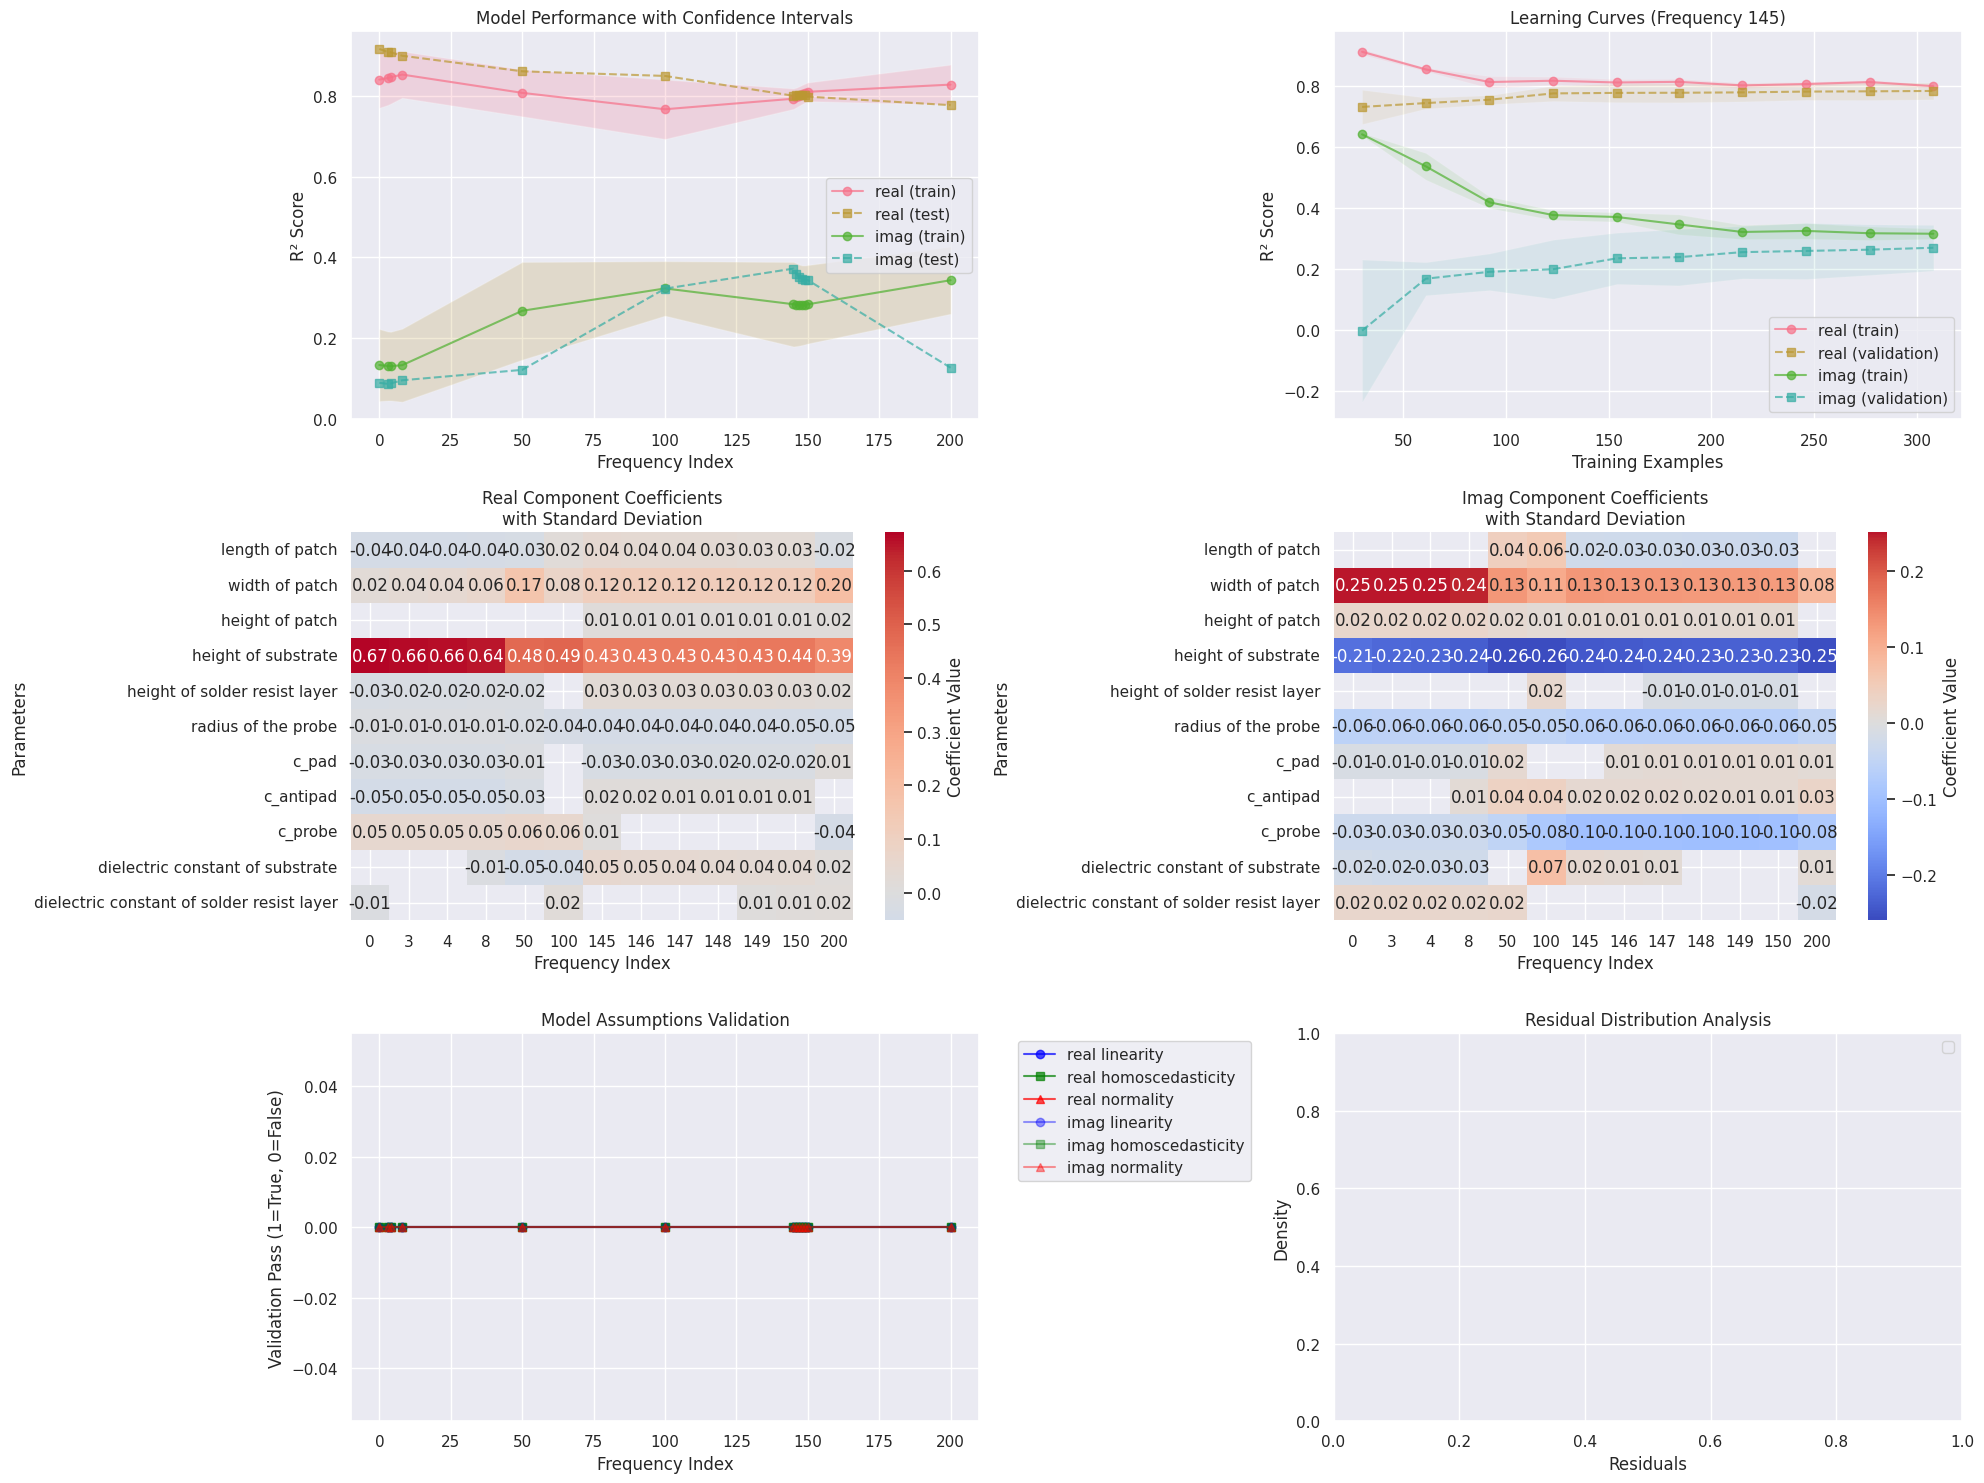

In [98]:
# 3. Enhanced Visualization and Analysis
plt.figure(figsize=(20, 15))

# Plot 1: R² Performance across frequencies (Fixed error bars)
plt.subplot(3, 2, 1)
for component in ['real', 'imag']:
    train_r2 = [m['train_r2'] for m in regression_results[component]['train_metrics']]
    test_r2 = [m['test_r2'] for m in regression_results[component]['train_metrics']]

    # Calculate standard error from cross-validation
    cv_std = [np.std([cv['r2'] for cv in m['cv_results']])
              for m in regression_results[component]['train_metrics']]

    plt.plot(selected_frequencies, train_r2,
             'o-', label=f'{component} (train)', alpha=0.7)
    plt.plot(selected_frequencies, test_r2,
             's--', label=f'{component} (test)', alpha=0.7)
    plt.fill_between(selected_frequencies,
                     np.array(train_r2) - cv_std,
                     np.array(train_r2) + cv_std,
                     alpha=0.2)

plt.xlabel('Frequency Index')
plt.ylabel('R² Score')
plt.title('Model Performance with Confidence Intervals')
plt.legend()
plt.grid(True)

# Plot 2: Learning Curves (Fixed middle frequency selection)
plt.subplot(3, 2, 2)
freq_idx = selected_frequencies[len(selected_frequencies)//2]
mid_idx = len(selected_frequencies)//2

for component in ['real', 'imag']:
    if mid_idx < len(regression_results[component]['train_metrics']):
        curves = regression_results[component]['train_metrics'][mid_idx]['learning_curves']

        # Calculate mean and std of scores
        train_mean = np.mean(curves['train_scores'], axis=1)
        val_mean = np.mean(curves['val_scores'], axis=1)
        train_std = np.std(curves['train_scores'], axis=1)
        val_std = np.std(curves['val_scores'], axis=1)

        plt.plot(curves['train_sizes'], train_mean,
                'o-', label=f'{component} (train)', alpha=0.7)
        plt.plot(curves['train_sizes'], val_mean,
                's--', label=f'{component} (validation)', alpha=0.7)
        plt.fill_between(curves['train_sizes'],
                        train_mean - train_std,
                        train_mean + train_std,
                        alpha=0.1)
        plt.fill_between(curves['train_sizes'],
                        val_mean - val_std,
                        val_mean + val_std,
                        alpha=0.1)

plt.xlabel('Training Examples')
plt.ylabel('R² Score')
plt.title(f'Learning Curves (Frequency {freq_idx})')
plt.legend()
plt.grid(True)

# Plot 3 & 4: Coefficient Evolution (Fixed heatmap display)
for comp_idx, component in enumerate(['real', 'imag']):
    plt.subplot(3, 2, 3 + comp_idx)

    coef_matrix = np.array([m['coefficients'] for m in regression_results[component]['train_metrics']])

    # Create mask for small values
    mask = np.abs(coef_matrix.T) < 0.01

    sns.heatmap(coef_matrix.T,
                cmap='coolwarm',
                center=0,
                annot=True,
                fmt='.2f',
                mask=mask,
                xticklabels=selected_frequencies,
                yticklabels=input_df.columns,
                cbar_kws={'label': 'Coefficient Value'})

    plt.title(f'{component.capitalize()} Component Coefficients\nwith Standard Deviation')
    plt.xlabel('Frequency Index')
    plt.ylabel('Parameters')

# Plot 5: Model Assumptions Validation (Fixed validation display)
plt.subplot(3, 2, 5)
validation_metrics = ['linearity', 'homoscedasticity', 'normality']
markers = ['o', 's', '^']
colors = ['blue', 'green', 'red']

for component in ['real', 'imag']:
    for i, metric in enumerate(validation_metrics):
        values = []
        for metrics in regression_results[component]['train_metrics']:
            try:
                # Get the validation result, default to False if missing
                val_result = metrics['cv_results'][0]['validation'][metric]['pass']
                values.append(1 if val_result else 0)
            except:
                values.append(0)

        plt.plot(selected_frequencies, values,
                f'{markers[i]}-',
                label=f'{component} {metric}',
                color=colors[i],
                alpha=0.7 if component == 'real' else 0.4)

plt.xlabel('Frequency Index')
plt.ylabel('Validation Pass (1=True, 0=False)')
plt.title('Model Assumptions Validation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Plot 6: Residual Analysis (Fixed residual plotting)
plt.subplot(3, 2, 6)
for component in ['real', 'imag']:
    # Collect all residuals
    all_residuals = []
    for metrics in regression_results[component]['train_metrics']:
        for cv_result in metrics['cv_results']:
            residuals = cv_result.get('residuals', [])
            if isinstance(residuals, (list, np.ndarray)) and len(residuals) > 0:
                all_residuals.extend(residuals)

    if all_residuals:
        sns.kdeplot(np.array(all_residuals),
                   label=f'{component} component',
                   alpha=0.7)

        # Add reference normal distribution
        x = np.linspace(np.min(all_residuals), np.max(all_residuals), 100)
        plt.plot(x, stats.norm.pdf(x, np.mean(all_residuals), np.std(all_residuals)),
                '--', alpha=0.5, label=f'{component} normal ref')

plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residual Distribution Analysis')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


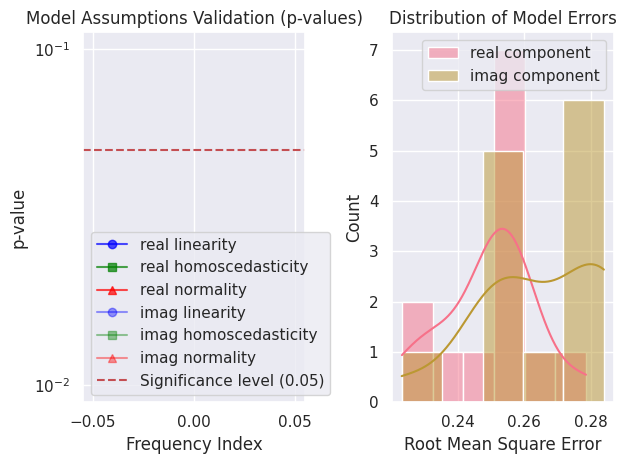


Model Validation Summary:

Real Component:

Imag Component:


In [99]:
# Model Assumptions Validation
plt.subplot(1, 2, 1)
validation_metrics = ['linearity', 'homoscedasticity', 'normality']
markers = ['o', 's', '^']
colors = ['blue', 'green', 'red']

for component in ['real', 'imag']:
    for i, metric in enumerate(validation_metrics):
        values = []
        for metrics in regression_results[component]['train_metrics']:
            # Extract p-values instead of just pass/fail
            try:
                val_result = metrics['cv_results'][0]['validation'][metric]['pvalue']
                values.append(val_result)
            except:
                values.append(np.nan)

        plt.plot(selected_frequencies, values,
                f'{markers[i]}-',
                label=f'{component} {metric}',
                color=colors[i],
                alpha=0.7 if component == 'real' else 0.4)

plt.axhline(y=0.05, color='r', linestyle='--', label='Significance level (0.05)')
plt.xlabel('Frequency Index')
plt.ylabel('p-value')
plt.yscale('log')  # Use log scale for p-values
plt.title('Model Assumptions Validation (p-values)')
plt.legend()
plt.grid(True)

# Residual Analysis
plt.subplot(1, 2, 2)
for component in ['real', 'imag']:
    # Collect all residuals from test predictions
    all_residuals = []
    for metrics in regression_results[component]['train_metrics']:
        residuals = metrics['test_rmse']  # Use RMSE as a measure of residuals
        if residuals is not None:
            all_residuals.append(residuals)

    if all_residuals:
        # Plot histogram of residuals
        sns.histplot(all_residuals,
                    label=f'{component} component',
                    alpha=0.5,
                    kde=True)

plt.xlabel('Root Mean Square Error')
plt.ylabel('Count')
plt.title('Distribution of Model Errors')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nModel Validation Summary:")
for component in ['real', 'imag']:
    print(f"\n{component.capitalize()} Component:")

    # Calculate average p-values for each assumption
    for metric in validation_metrics:
        p_values = []
        for metrics in regression_results[component]['train_metrics']:
            try:
                p_val = metrics['cv_results'][0]['validation'][metric]['pvalue']
                p_values.append(p_val)
            except:
                continue

        if p_values:
            avg_p = np.mean(p_values)
            print(f"{metric.capitalize()} test: mean p-value = {avg_p:.4f}")
            print(f"  - Assumption {'satisfied' if avg_p > 0.05 else 'violated'}")

In [70]:
# 4. Enhanced Results Interpretation and Summary
print("\nComprehensive Analysis Summary:")

# 4.1 Model Performance Summary
print("\nModel Performance Summary:")
for component in ['real', 'imag']:
    print(f"\n{component.capitalize()} Component:")
    avg_metrics = {
        'train_r2': np.mean([m['train_r2'] for m in regression_results[component]['train_metrics']]),
        'test_r2': np.mean([m['test_r2'] for m in regression_results[component]['train_metrics']]),
        'train_rmse': np.mean([m['train_rmse'] for m in regression_results[component]['train_metrics']]),
        'test_rmse': np.mean([m['test_rmse'] for m in regression_results[component]['train_metrics']])
    }

    print(f"Average Train R²: {avg_metrics['train_r2']:.4f}")
    print(f"Average Test R²: {avg_metrics['test_r2']:.4f}")
    print(f"Average Train RMSE: {avg_metrics['train_rmse']:.4f}")
    print(f"Average Test RMSE: {avg_metrics['test_rmse']:.4f}")
    print(f"Model Stability (R² difference): {abs(avg_metrics['train_r2'] - avg_metrics['test_r2']):.4f}")

# 4.2 Physical Parameter Importance Analysis
print("\nParameter Importance Analysis:")
for component in ['real', 'imag']:
    print(f"\n{component.capitalize()} Component Important Parameters:")
    coef_importance = np.abs([m['coefficients'] for m in regression_results[component]['train_metrics']]).mean(axis=0)
    coef_std = np.abs([m['coefficients'] for m in regression_results[component]['train_metrics']]).std(axis=0)

    # Sort parameters by importance
    importance_df = pd.DataFrame({
        'mean_importance': coef_importance,
        'std_importance': coef_std
    }).sort_values('mean_importance', ascending=False)

    for param, row in importance_df.iterrows():
        print(f"{param}:")
        print(f"  - Importance: {row['mean_importance']:.4f} ± {row['std_importance']:.4f}")

        # Add physical interpretation
        if param in ['length of patch', 'width of patch']:
            print("  - Controls resonant frequency and radiation pattern")
        elif param in ['height of substrate', 'height of patch']:
            print("  - Affects bandwidth and efficiency")
        elif 'dielectric' in param:
            print("  - Influences wave propagation and resonance")
        elif param in ['c_pad', 'c_antipad', 'c_probe']:
            print("  - Affects impedance matching and feeding")

# 4.3 Model Validation Summary
print("\nModel Validation Summary:")
for component in ['real', 'imag']:
    print(f"\n{component.capitalize()} Component:")
    validation_pass = {metric: 0 for metric in validation_metrics}
    total_tests = len(selected_frequencies)

    for metrics in regression_results[component]['train_metrics']:
        for metric in validation_metrics:
            if metrics['cv_results'][0]['validation'][metric]['pass']:
                validation_pass[metric] += 1

    for metric, passes in validation_pass.items():
        print(f"{metric.capitalize()} assumption passed in {passes}/{total_tests} frequencies "
              f"({passes/total_tests*100:.1f}%)")

# 4.4 Frequency-Specific Analysis
print("\nFrequency-Specific Analysis:")
for freq_idx in selected_frequencies:
    freq_idx_position = np.where(selected_frequencies == freq_idx)[0][0]
    print(f"\nFrequency {freq_idx}:")
    print("Resonance characteristics:")
    resonance_info = resonance_df[resonance_df['frequency'] == freq_idx]
    if not resonance_info.empty:
        print(f"  - Resonance magnitude: {resonance_info['magnitude'].values[0]:.4f}")
        print(f"  - Q-factor: {resonance_info['q_factor'].values[0]:.4f}")
    else:
        print("  - No resonance at this frequency")

    print("Model performance:")
    for component in ['real', 'imag']:
        metrics = regression_results[component]['train_metrics'][freq_idx_position]
        print(f"  {component.capitalize()}:")
        print(f"    R² (train/test): {metrics['train_r2']:.4f}/{metrics['test_r2']:.4f}")
        print(f"    RMSE (train/test): {metrics['train_rmse']:.4f}/{metrics['test_rmse']:.4f}")

# Store comprehensive results
analysis_results = {
    'selected_frequencies': selected_frequencies,
    'frequency_metrics': frequency_metrics,
    'resonance_analysis': resonance_df,
    'regression_results': regression_results,
    'validation_summary': validation_pass
}

Comprehensive Regression Analysis Summary:

Real Component Analysis:

Average Train R²: 0.8182
Average Test R²: 0.8124
Average Train RMSE: 0.2858
Average Test RMSE: 0.2904
Model Stability (R² difference): 0.0058
Parameter Importance Ranking:
height of substrate: 0.4733
width of patch: 0.1391
c_probe: 0.0396
dielectric constant of substrate: 0.0376
length of patch: 0.0322
radius of the probe: 0.0300
c_pad: 0.0202
c_antipad: 0.0201
height of solder resist layer: 0.0137
dielectric constant of solder resist layer: 0.0127
height of patch: 0.0070

Imag Component Analysis:

Average Train R²: 0.2843
Average Test R²: 0.1555
Average Train RMSE: 0.2868
Average Test RMSE: 0.3130
Model Stability (R² difference): 0.1288
Parameter Importance Ranking:
height of substrate: 0.2578
width of patch: 0.1351
c_probe: 0.0747
radius of the probe: 0.0485
dielectric constant of substrate: 0.0399
height of patch: 0.0227
c_antipad: 0.0211
dielectric constant of solder resist layer: 0.0178
length of patch: 0.0178
c